In [59]:
import numpy as np

from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
def to_zscore(p, two_tailed=False, correct_p=True):
    """
    Get the percept point function
    of a N(0,1) and change it to a Z score
    """
    if correct_p:
        if p == 0:
            p = 0.0001
        elif p == 1:
            p = 0.9999

    perc = norm.ppf(p)
    z = perc
    if two_tailed:
        z = z/2
    return z

def compute_d_c(hit_rate, false_allarm):
    """
    Compute d' and criterion given hit_rate and
    false allarm
    """
    d_prime = to_zscore(hit_rate) - to_zscore(false_allarm)
    c =  - (to_zscore(hit_rate) + to_zscore(false_allarm)) / 2 
    return d_prime, c

def sigmoid(x, alpha, beta):
    """
    Compute sigmoid of x given midpoint and
    steepness
    """
    p = 1 / (1 + np.exp(-alpha*(x - beta)))
    return p

def logit(p):
    """
    Compute the logit of p
    """
    x = np.log(p / (1 - p))
    return x

def psicometric_function(x, y, alpha, beta, target=500, d=1000):
    """
    Visualize psy
    """
    para, cov = curve_fit(
        sigmoid, 
        x, 
        y, 
        p0=[alpha, beta]
    )
    alpha, beta = para
    
    line = np.linspace(x.min(), x.max(), d)
    ps = sigmoid(line, alpha, beta)
    
    
    plt.figure(figsize=(5, 5))
    plt.scatter(
        x,
        y,
        facecolors='none', 
        edgecolors='k'
    )
    
    plt.plot(
        line,
        ps,
        c='g'
    )
    
    plt.plot(
        [x.min(), target],
        sigmoid(np.array([target]*2), alpha, beta),
        linestyle='--',
        color='k'
    
    )
    
    plt.plot(
        [target, target],
        [y.min(), sigmoid(np.array([target]), alpha, beta)],
        linestyle='--',
        color='k'
    
    )
    
    plt.show()
    return None

Q1. Convert p-values: 0, .1, .5, .975, and 1 to z scores

In [3]:
for p in [0, 0.05, .1, .5, .975, 1]:
    
    print(f'Z Score {to_zscore(p)}')

Z Score -3.7190164854556804
Z Score -1.6448536269514729
Z Score -1.2815515655446004
Z Score 0.0
Z Score 1.959963984540054
Z Score 3.719016485455709


Q2 Using the equations and MATLAB screenshots from the lecture, compute d-prime and c on the following data (hit rate = .8, false alarm rate = .3). What is the outcome and what do the values mean? Try computing d-prime and c using different values. When do you get no bias?

In [4]:
d, c = compute_d_c(.8, .3)
print(f"D': {d} Criterion: {c}")

D': 1.3660217462809552 Criterion: -0.1586103604324367


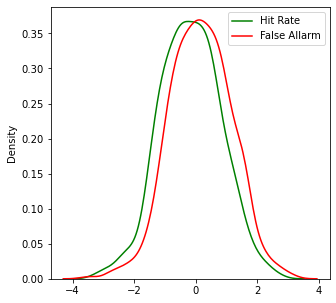

Hit Rate 0.4444444444444444 False Allarm 0.5555555555555556
D': -0.27942059776372424 Criterion: -0.0


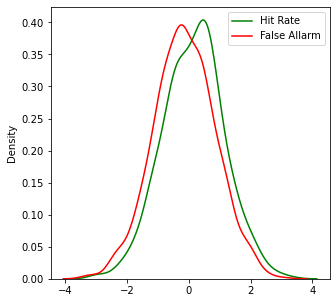

Hit Rate 0.5555555555555556 False Allarm 0.4444444444444444
D': 0.27942059776372424 Criterion: -0.0


In [9]:
for hit_rate in np.linspace(0, 1, 10):
    
    for false_allarm in np.linspace(0, 1, 10):
        
        d, c = compute_d_c(hit_rate, false_allarm)
        if c == 0:
            
            plt.figure(figsize=(5, 5))
            sns.kdeplot(np.random.normal(to_zscore(hit_rate), 1, 1000), c='g', label='Hit Rate')
            sns.kdeplot(np.random.normal(to_zscore(false_allarm), 1, 1000), c='r', label='False Allarm')
            plt.legend()
            plt.show()
            
            print(f'Hit Rate {hit_rate} False Allarm {false_allarm}')
            print(f"D': {d} Criterion: {c}")

Q3 Try to compute the hit rate and false alarm rate and then compute d-prime and c for the following dataset

In [45]:
stimuli = np.array(([0]*50) + ([1]*50))
responses = np.array(([0]*40) + ([1]*10) + ([0]*5) + ([1]*45))

dataset = np.array([stimuli, responses]).T
np.random.shuffle(dataset)

In [53]:
hit_rate = np.sum(dataset[:, 0] == dataset[:, 1]) / len(dataset)
false_allarm = np.sum((dataset[:, 0] == 0) & (dataset[:, 1] == 1)) / len(dataset)

d, c = compute_d_c(hit_rate, false_allarm)

print(f'Hit Rate {hit_rate} False Allarm {false_allarm}')
print(f"D': {d} Criterion: {c}")

Hit Rate 0.85 False Allarm 0.1
D': 2.31798495503839 Criterion: 0.12255908802540527


Q4 A participant completed a time perception task in which she had to judge whether stimuli of varying intervals were shorter than or longer than a 500ms interval she had previously learned. For the intervals of 200, 300, 400, 500, 600, 700, and 800, she judged that the interval was long 1, 12, 23, 52, 66, 81, and 92 times. There were 100 presentations of each interval. Fit a logistic function to this data and report the point of subjective equality, and beta for the psychometric function. Note that gamma (guess rate) will be 0. 

In [61]:
data = np.array([[200, 300, 400, 500, 600, 700, 800], [1, 12,23, 52, 66, 81, 92], [100]*7]).T
accuracies = data[:,1] / 100

C:\Users\penthotal\miniconda3\envs\sem_env\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\penthotal\miniconda3\envs\sem_env\lib\site-packages\ipykernel_launcher.py:88: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


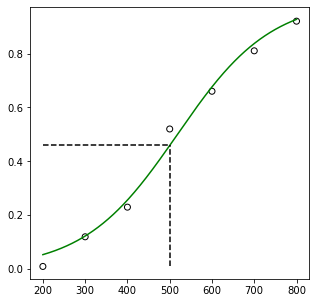

In [94]:
psicometric_function(
    data[:, 0], 
    accuracies, 
    alpha=0.01, 
    beta=500
)